In [1]:
# import numpy
# import pandas

In [2]:
import numpy as np
import pandas as pd
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

client = Client("IRIS")

class Fetch():
    def _getRefResponse(self):
        t0 = UTCDateTime(1989, 1, 1)
        inv = self.client.get_stations(network="SR", station="ANMO", channel="LH*", 
                            level="response", 
                            starttime=t0, endtime=t0+1)
        # client.save_response('SR.ANMO.dataless', 'SR', 'ANMO', '', '*', t0, t0 + 1, format="SEED")
        # inv.plot_response(min_freq=0.001)
        self.refResponse = inv
        return 0

    def _readTable():
        # get traces
        {}

        return 0

    def __init__(self, client):
        self.client = client
        self._getRefResponse()

In [2]:
import numpy as np
from obspy.core import read
from obspy.core import UTCDateTime
obsfile_name = 'training/1976-05-05T04:52:51.000Z/HG.KIP.LH.obspy'
resample = 8.0

p_calctim = UTCDateTime('1976-05-05T04:52:51.000Z') + 567.7075
print(p_calctim)
# event_name = f"{trace.labelsta['name']}.network_code_{event.srctime.year:4d}{event.srctime.month:02d}{event.srctime.day:02d}{event.srctime.hour:02d}{event.srctime.minute:02d}{event.srctime.second:02d}_EV"

event_obspy = read(obsfile_name)
if len(event_obspy) == 3:
    if resample != 0:
        delta = 1/resample
        event_obspy.resample(resample)
        # event_obspy.trim(starttime=p_calctim-100, endtime=p_calctim+1400)
        stdshape = (int(1500*resample), 3)
        event_data = np.transpose([np.array(event_obspy[0].trim(starttime=p_calctim-100, endtime=p_calctim+1400).data, dtype=np.float32), np.array(event_obspy[1].trim(starttime=p_calctim-100, endtime=p_calctim+1400).data, dtype=np.float32), np.array(event_obspy[2].trim(starttime=p_calctim-100, endtime=p_calctim+1400).data, dtype=np.float32)]) 

1976-05-05T05:02:18.707500Z


In [6]:
if event_data.shape[0] <= int(1520*resample) and event_data.shape[0] > int(1500*resample): event_data = event_data[:int(1500*resample),0:3]
print(event_data.shape==stdshape)

True


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


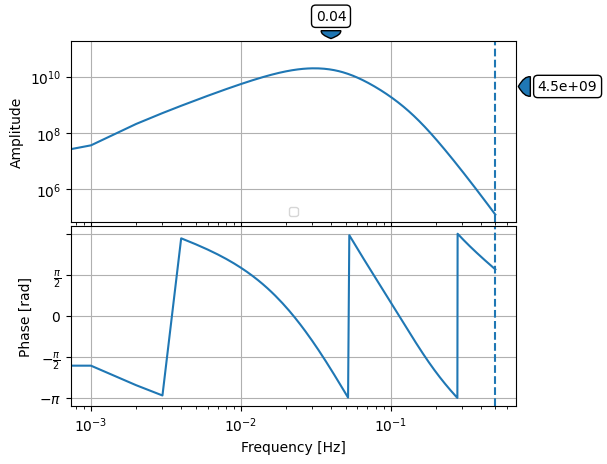

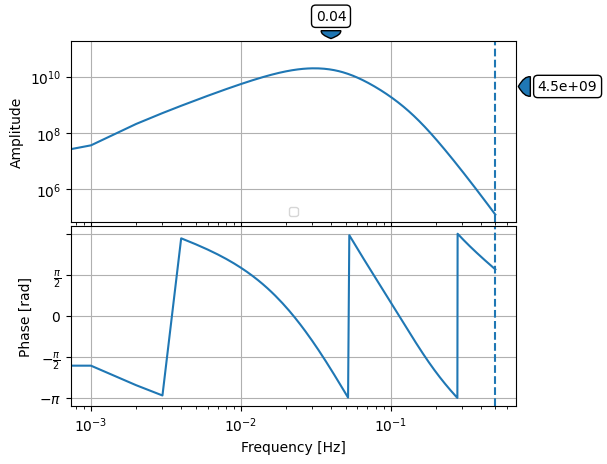

In [362]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

client = Client("IRIS")
t0 = UTCDateTime(1989, 1, 1)
inv = client.get_stations(network="SR", station="ANMO", channel="LH*", 
                            level="response", 
                            starttime=t0, endtime=t0+1)
inv[0][0][2].response.plot(0.001)

In [22]:
from obspy.core import UTCDateTime
UTCDateTime("2009-365T9:23:24.0Z")

2009-12-31T09:23:24.000000Z

In [510]:
achar = 'a'
achar += '-'
achar

'a-'

In [28]:
import pandas as pd
table = pd.read_csv("/Users/jun/Downloads/drive-download-20220512T014633Z-001/Pcomb.4.07.09.table", delim_whitespace=True)
table[table['sec']>=60]
# for index, row in table[0:10].iterrows():
    # print(row)

,phase,residual,error,ellipcor,crustcor,obstim,calctim,year,day,hour,min,sec,eqlat,eqlon,eqdep,station,stalat,stalon,dist,azi
14948,P,3.738,2.0,0.195,-0.428,419.8473,416.1090,1988,343,12,58,60.0,6.92,-82.74,10.0,ANMO,34.946,253.543,35.417,325.239
14949,P,3.953,2.0,0.257,-0.397,479.0323,475.0794,1988,343,12,58,60.0,6.92,-82.74,10.0,PAS,34.148,241.828,42.459,314.584
14950,P,4.854,2.0,0.256,-0.764,467.6888,462.8350,1988,343,12,58,60.0,6.92,-82.74,10.0,PFO,33.609,243.545,40.964,315.042
14951,P,3.682,1.0,0.303,0.684,347.5404,343.8579,1988,343,12,58,60.0,6.92,-82.74,10.0,ZOBO,-16.269,291.875,27.205,147.988
18013,P,3.371,3.0,0.364,0.420,778.5012,775.1298,1990,108,18,32,60.0,1.32,123.02,19.0,ANTO,39.869,32.794,89.337,309.676
18014,P,4.994,2.0,0.514,-0.377,511.2368,506.2424,1990,108,18,32,60.0,1.32,123.02,19.0,HYB,17.420,78.550,46.534,292.854
18015,P,4.443,3.0,0.045,-1.039,661.0176,656.5751,1990,108,18,32,60.0,1.32,123.02,19.0,PAF,-49.351,70.213,67.797,214.239
18016,P,6.201,3.0,0.090,-0.412,532.8149,526.6143,1990,108,18,32,60.0,1.32,123.02,19.0,TAU,-42.910,147.320,49.163,156.445
19774,P,4.477,3.0,-0.018,0.572,363.4810,359.0043,1990,298,4,53,60.0,35.12,70.49,113.0,ANTO,39.869,32.794,30.131,290.361
19775,P,3.012,2.0,-0.044,-0.110,482.2055,479.1931,1990,298,4,53,60.0,35.12,70.49,113.0,AQU,42.354,13.403,44.390,297.184


In [552]:
# from obspy.core import UTCDateTime
# DT.MAT.NG.LHE | 1976-01-09T23:24:35.600000Z - 1976-01-10T01:54:35.600000Z | 100.0 Hz, 900001
t = UTCDateTime("1976-01-09T23:54:35.600000Z")
st_raw = client.get_waveforms("DT", "MAT", "*", "LH*", t - 0.5 * 60 * 60, t + 2 * 60 * 60, attach_response=True)

In [553]:
st_raw

16 Trace(s) in Stream:
DT.MAT.NG.LHE | 1976-01-09T23:24:35.600000Z - 1976-01-10T01:54:35.600000Z | 100.0 Hz, 900001 samples
DT.MAT.NG.LHN | 1976-01-09T23:24:35.600000Z - 1976-01-10T01:54:35.600000Z | 100.0 Hz, 900001 samples
DT.MAT.NG.LHV | 1976-01-09T23:24:35.600000Z - 1976-01-10T01:54:35.600000Z | 100.0 Hz, 900001 samples
DT.MAT.NG.LLE | 1976-01-09T23:24:35.600000Z - 1976-01-10T01:54:35.600000Z | 100.0 Hz, 900001 samples
DT.MAT.NG.LLN | 1976-01-09T23:24:35.600000Z - 1976-01-10T01:54:35.600000Z | 100.0 Hz, 900001 samples
DT.MAT.NG.LLV | 1976-01-09T23:24:35.600000Z - 1976-01-10T01:54:35.600000Z | 100.0 Hz, 900001 samples
DT.MAT.NG.LME | 1976-01-09T23:24:35.600000Z - 1976-01-10T01:54:35.600000Z | 100.0 Hz, 900001 samples
DT.MAT.NG.LMN | 1976-01-09T23:24:35.600000Z - 1976-01-10T01:54:35.600000Z | 100.0 Hz, 900001 samples
DT.MAT.NG.LMV | 1976-01-09T23:24:35.600000Z - 1976-01-10T01:54:35.600000Z | 100.0 Hz, 900001 samples
DT.MAT.NG.SHE | 1976-01-09T23:24:35.600000Z - 1976-01-10T01:54:35.60

/Users/jun/.local/share/virtualenvs/phasepick-mEodVLkE/lib/python3.9/site-packages/obspy/core/stream.py:3134: UserWarning: No matching response information found.
  warnings.warn(str(e))


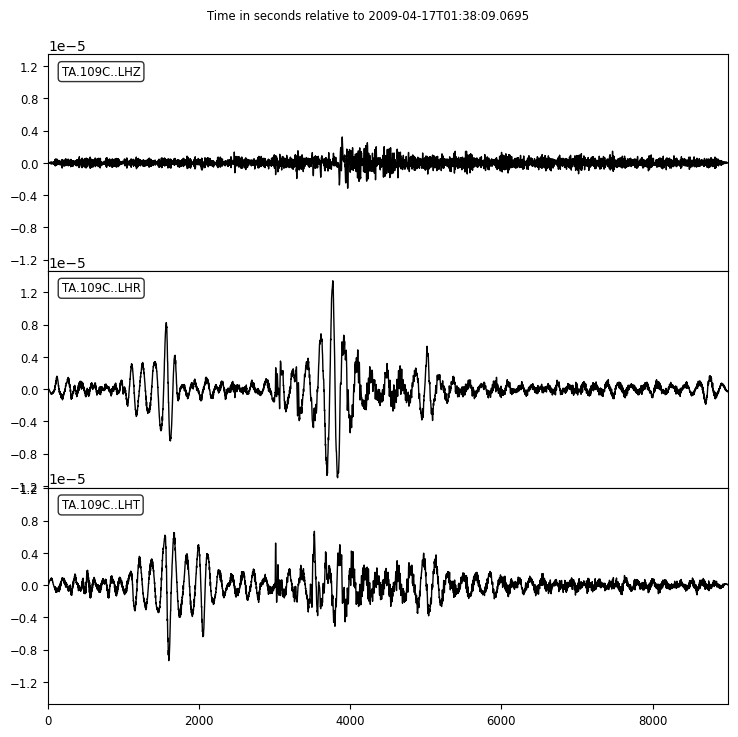

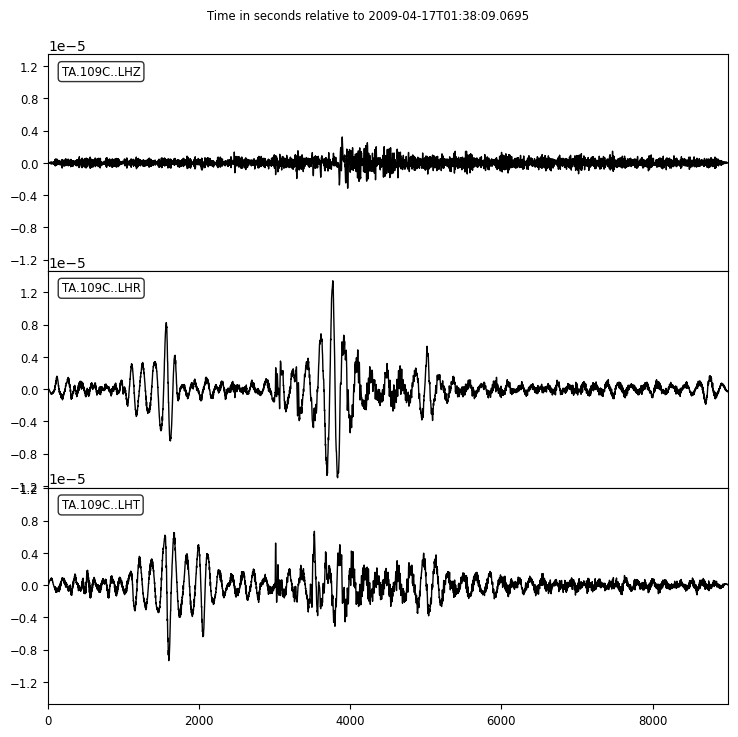

In [3]:
from obspy.geodetics.base import gps2dist_azimuth
# t = UTCDateTime("1995-01-03T16:11:57.080")
# st = client.get_waveforms("II", "FFC", "00", "LHZ", t, t + 2 * 60 * 60).detrend("spline", order=2, dspline=500).filter('lowpass', freq=0.03, corners=2, zerophase=True)

def get_all(t):
    st_raw = client.get_waveforms("TA", "109C", "*", "LH*", t - 0.5 * 60 * 60, t + 2 * 60 * 60, attach_response=True)
    cat = client.get_events(starttime=t-1, endtime=t+1, minmagnitude=5, catalog="ISC")
    if not len(cat) == 1:
        raise ValueError("None or more than 1 events found.")

    inv = client.get_stations(network="TA", station="109C")
    baz = gps2dist_azimuth(lat1=cat[0].origins[0].latitude, lon1=cat[0].origins[0].longitude, lat2=inv[0][0].latitude, lon2=inv[0][0].longitude)
    return st_raw, baz

t = UTCDateTime("2009-04-17T02:08:8.700")
if not 'st_raw' in globals():
    st_raw, baz = get_all(t)
elif abs(st_raw[0].stats.starttime - t) > 2:
    st_raw, baz = get_all(t)  
    
st = st_raw.copy()
st[0:3] = st.remove_response(output="DISP", pre_filt=(0.005, 0.006, 30.0, 35.0)) \
    .attach_response(inv)

st = st.rotate('NE->RT', back_azimuth=baz[2]) \
    .resample(1.00)
    # .detrend("spline", order=2, dspline=500) \
    # .filter('lowpass', freq=0.05, corners=2, zerophase=False) \
    # .filter('bandpass', freqmin=0.03, freqmax=0.05, corners=2, zerophase=True)
st.plot(type='relative')
# st.plot(starttime=t+2000, endtime=t+2500)

/Users/jun/phasepick/venv-3.7/lib/python3.7/site-packages/obspy/core/stream.py:3197: UserWarning: No matching response information found.
  warnings.warn(str(e))


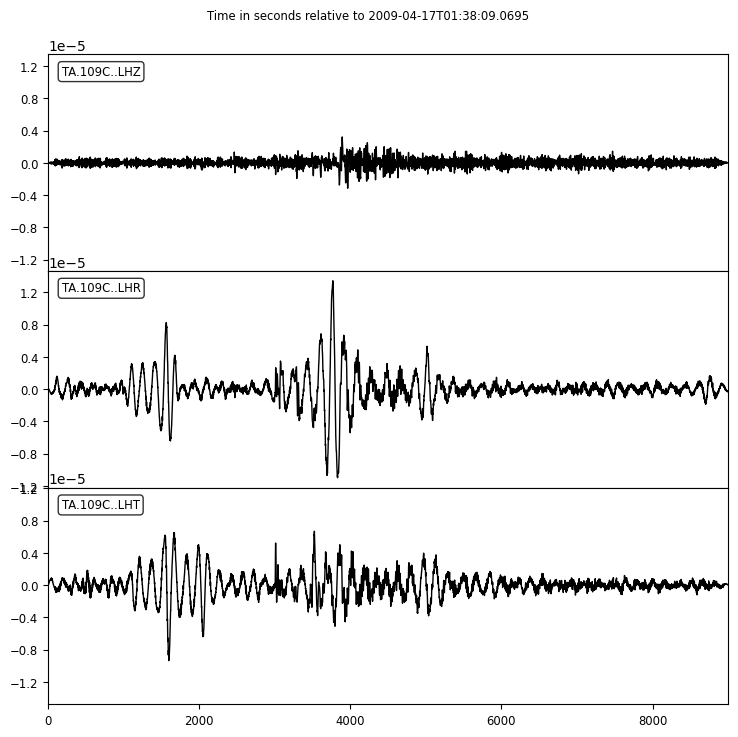

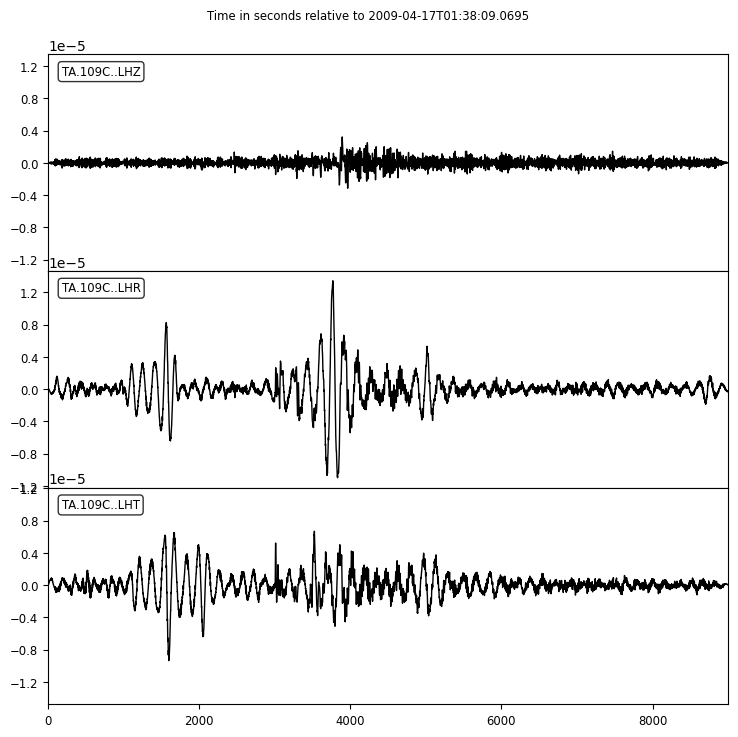

In [31]:
from obspy.geodetics.base import gps2dist_azimuth
# t = UTCDateTime("1995-01-03T16:11:57.080")
# st = client.get_waveforms("II", "FFC", "00", "LHZ", t, t + 2 * 60 * 60).detrend("spline", order=2, dspline=500).filter('lowpass', freq=0.03, corners=2, zerophase=True)

def get_all(t):
    st_raw = client.get_waveforms("TA", "109C", "*", "LH*", t - 0.5 * 60 * 60, t + 2 * 60 * 60, attach_response=True)
    cat = client.get_events(starttime=t-1, endtime=t+1, minmagnitude=5, catalog="ISC")
    if not len(cat) == 1:
        raise ValueError("None or more than 1 events found.")

    inv = client.get_stations(network="TA", station="109C")
    baz = gps2dist_azimuth(lat1=cat[0].origins[0].latitude, lon1=cat[0].origins[0].longitude, lat2=inv[0][0].latitude, lon2=inv[0][0].longitude)
    return st_raw, baz

t = UTCDateTime("2009-04-17T02:08:8.700")
if not 'st_raw' in globals():
    st_raw, baz = get_all(t)
elif abs(st_raw[0].stats.starttime - t) > 2:
    st_raw, baz = get_all(t)  
    
client = Client('IRIS')
st = st_raw.copy()
st.remove_response(output="DISP", pre_filt=(0.005, 0.006, 30.0, 35.0)) \
    .attach_response(ref_response)

st = st.rotate('NE->RT', back_azimuth=baz[2]) \
    .resample(1.00)
    # .detrend("spline", order=2, dspline=500) \
    # .filter('lowpass', freq=0.05, corners=2, zerophase=False) \
    # .filter('bandpass', freqmin=0.03, freqmax=0.05, corners=2, zerophase=True)
# st_raw
st.plot(type='relative')
# st.plot(starttime=t+2000, endtime=t+2500)

## treatment

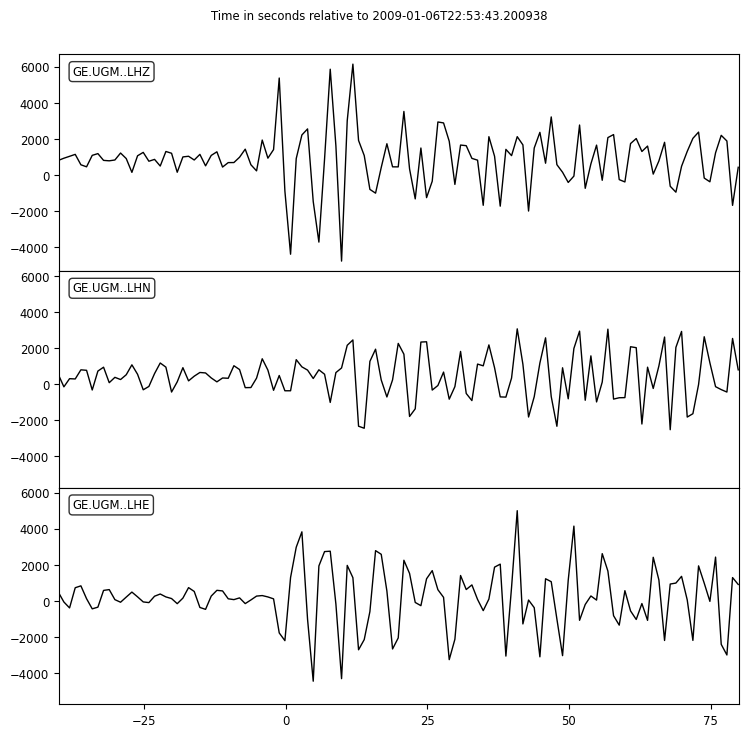

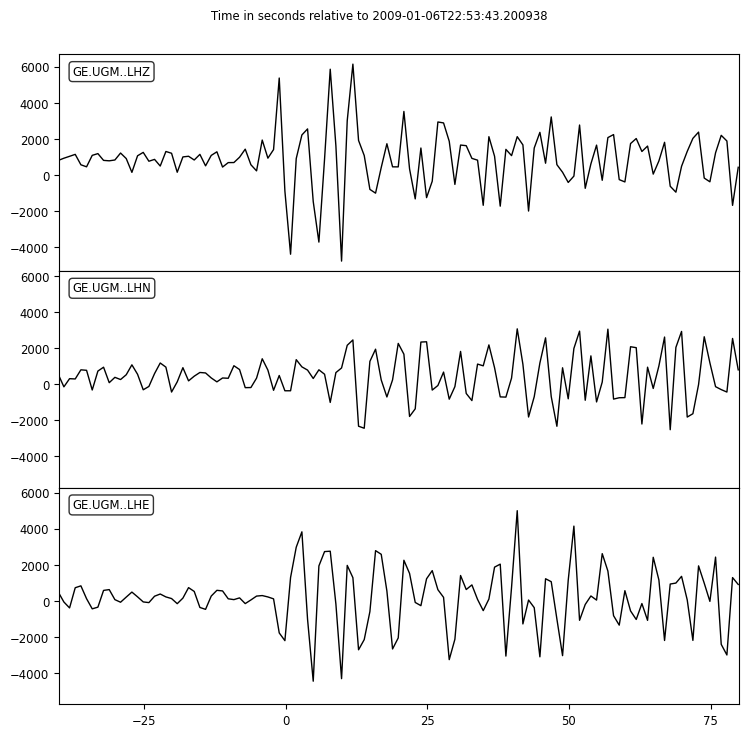

In [437]:
from obspy import read
from obspy.clients.fdsn import Client
from obspy.geodetics.base import gps2dist_azimuth
from obspy.signal.invsim import simulate_seismometer
client = Client('IRIS')
# stream = read("./rawdata/2009-04-17T02:08:08.700Z/TA.109C.LH.obspy")
# stream = read("./rawdata/2009-01-04T07:14:00.600Z/II.ABKT.LH.obspy"); tobs=1324.2316
# saved_stream = read("./training/2009-01-04T07:14:00.600Z/II.ABKT.LH.obspy"); tobs=1324.2316
# stream = read("./rawdata/2009-01-13T14:04:02.600Z/II.EFI.LH.obspy"); tobs=828.3197
stream = read("./rawdata/2009-01-06T22:48:27.200Z/GE.UGM.LH.obspy"); tobs=315.1314;# tobs=566.3833
# stream = read("./rawdata/2007-09-26T04:43:17.600Z/TA.M03C.LH.obspy")
# stream = read('rawdata/2007-11-20T17:55:51.500Z/TA.D06A.LH.obspy'); tobs=748.8623
inv = client.get_stations(network=stream[0].stats.network, station=stream[0].stats.station, channel="LH*", 
                                level="response", 
                                starttime=stream[0].stats.starttime, endtime=stream[0].stats.starttime+1)
# stream.plot(type='relative')
stream.plot(starttime=stream[0].stats.starttime+1800+tobs-40, endtime=stream[0].stats.starttime+1800+tobs+80, reftime=stream[0].stats.starttime+1800+tobs,type="relative")

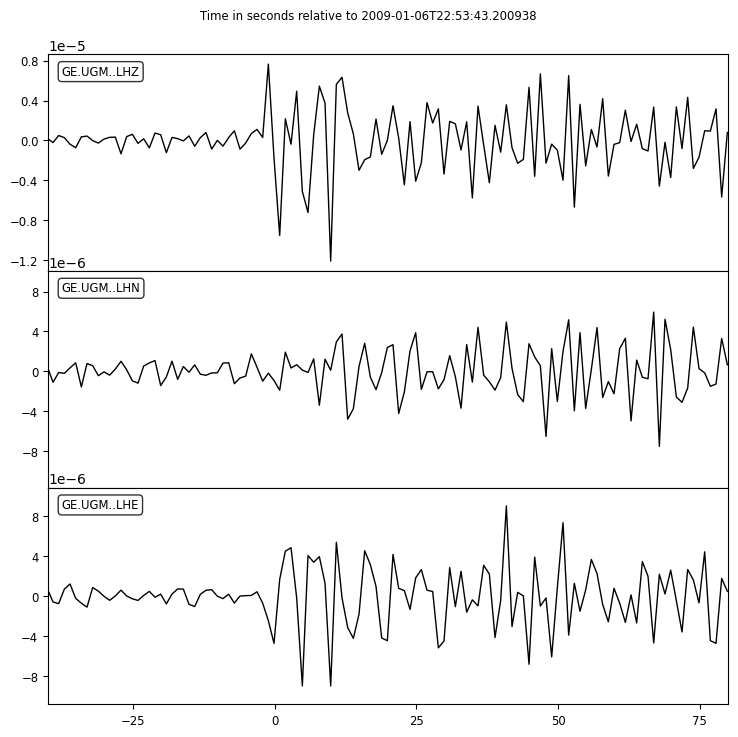

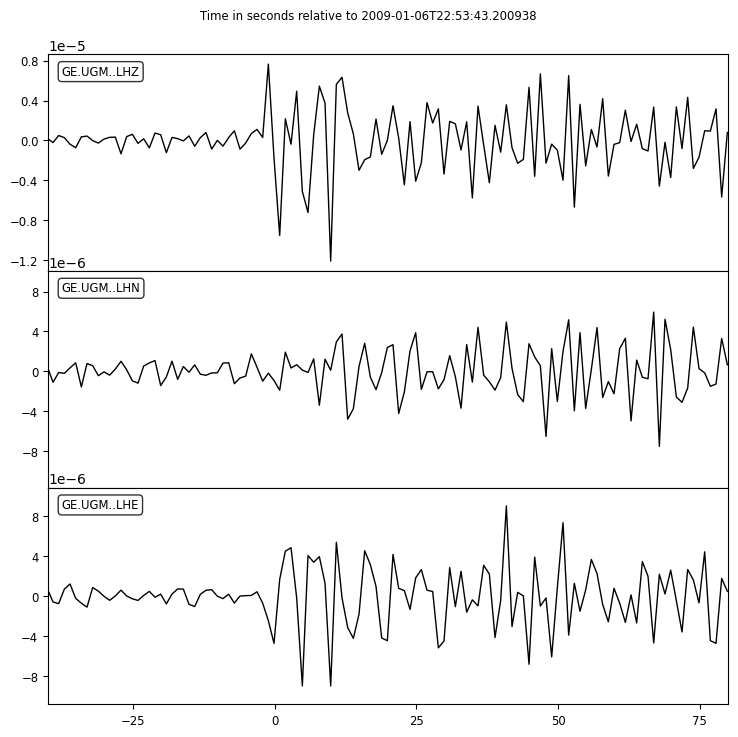

In [438]:
removed = stream.copy().remove_response(inventory=inv, pre_filt=(0.005, 0.006, 30.0, 35.0))
# removed = stream.copy().remove_response(inventory=inv, pre_filt=(0.003, 0.004, 30.0, 35.0))
# removed.plot(type='relative')
removed.plot(starttime=stream[0].stats.starttime+1800+tobs-40, endtime=stream[0].stats.starttime+1800+tobs+80, reftime=stream[0].stats.starttime+1800+tobs,type="relative")

In [439]:
from obspy.core import UTCDateTime
# t0 = UTCDateTime(1989, 1, 1)
# ref_response = client.get_stations(network="SR", station="ANMO", channel="LH*", 
#                     level="response", 
#                     starttime=t0, endtime=t0+1)
t0 = UTCDateTime(1983, 1, 1)
ref_response = client.get_stations(network="SR", station="GRFO", channel="LH*", 
                    level="response", 
                    starttime=t0, endtime=t0+1)
# ref_response[0][0][0].response

In [214]:
ref_response[0][0][0].response.get_paz()

Response type: PolesZerosResponseStage, Stage Sequence Number: 1
	From M (Earth Displacement in Meters) to COUNTS (Digital Counts)
	Stage gain: UNKNOWN, defined at UNKNOWN Hz
	Transfer function type: LAPLACE (RADIANS/SECOND)
	Normalization factor: 97720.1, Normalization frequency: 0.04 Hz
	Poles: (-4.65+3.46j), (-4.65-3.46j), (-0.118+0j), (-40.7+0j), (-100+0j), (-0.15+0j), (-264+0j), (-3.93+0j), (-0.282+0j), (-0.201+0.241j), (-0.201-0.241j), (-0.134+0.1j), (-0.134-0.1j), (-0.0251+0j), (-0.00924+0j), (-0.855+0.255j), (-0.855-0.255j), (-0.542+0.683j), (-0.542-0.683j)
	Zeros: (-0.126+0j), (-50.1+0j), 1.05j, -1.05j, 0j, 0j, 0j, 0j, 0j

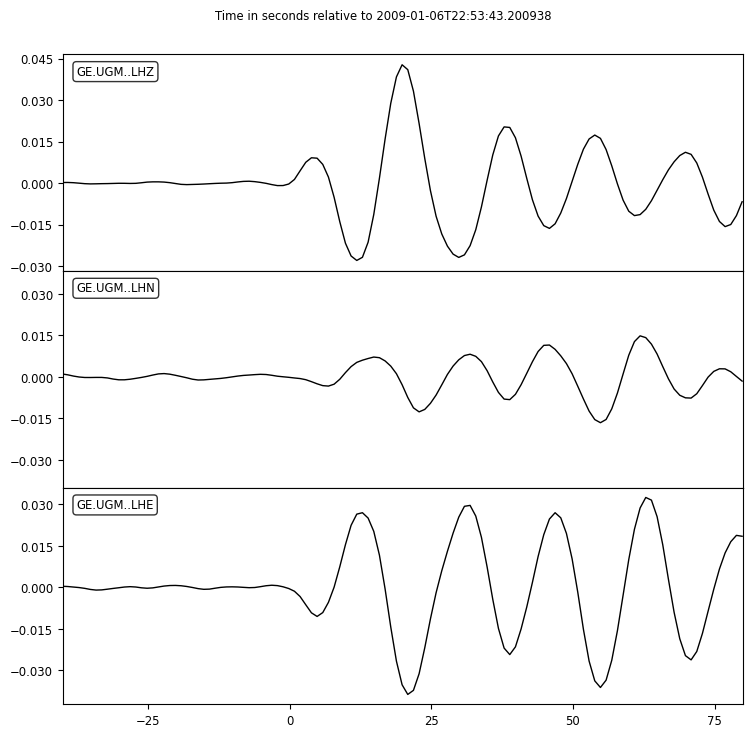

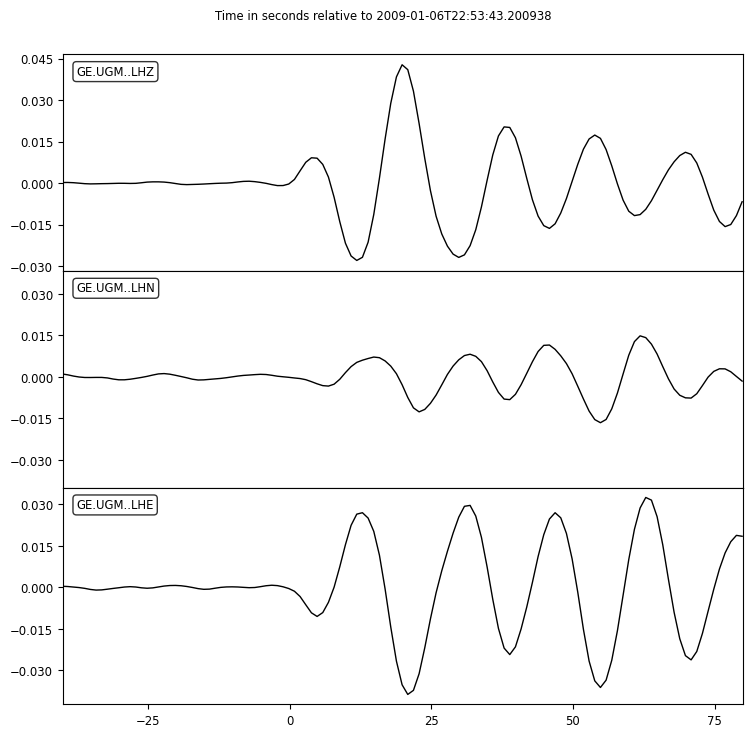

In [440]:
attached = removed.copy() 
# attached.attach_response(ref_response)
for i in range(3):
    j = i if len(ref_response[0][0])>1 else 0
    sts2 = {'gain': ref_response[0][0][j].response.get_paz().stage_gain if ref_response[0][0][j].response.get_paz().stage_sequence_number>1 else 1, #gain set as 1 if only one stage sequence
        'poles': ref_response[0][0][j].response.get_paz().poles,
        'sensitivity': ref_response[0][0][j].response.instrument_sensitivity.value,
        'zeros': ref_response[0][0][j].response.get_paz().zeros}
    attached[i].data = simulate_seismometer(attached[i].data, samp_rate=attached[0].stats.sampling_rate, paz_simulate=sts2)

# attached.plot(type='relative')
attached.plot(starttime=stream[0].stats.starttime+1800+tobs-40, endtime=stream[0].stats.starttime+1800+tobs+80, reftime=stream[0].stats.starttime+1800+tobs,type="relative")

In [120]:
baz

(6326376.939912301, 62.854374712984296, 346.5882428557458)

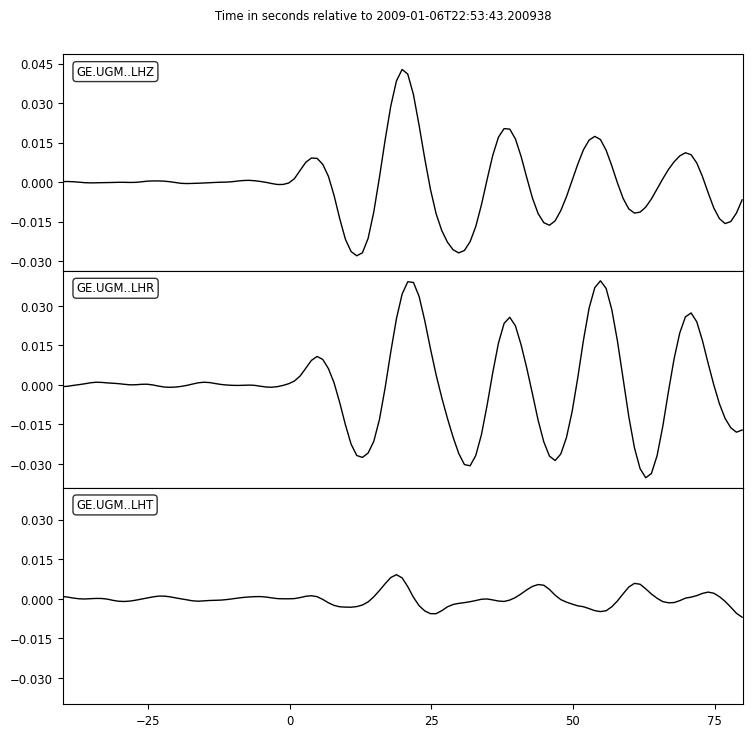

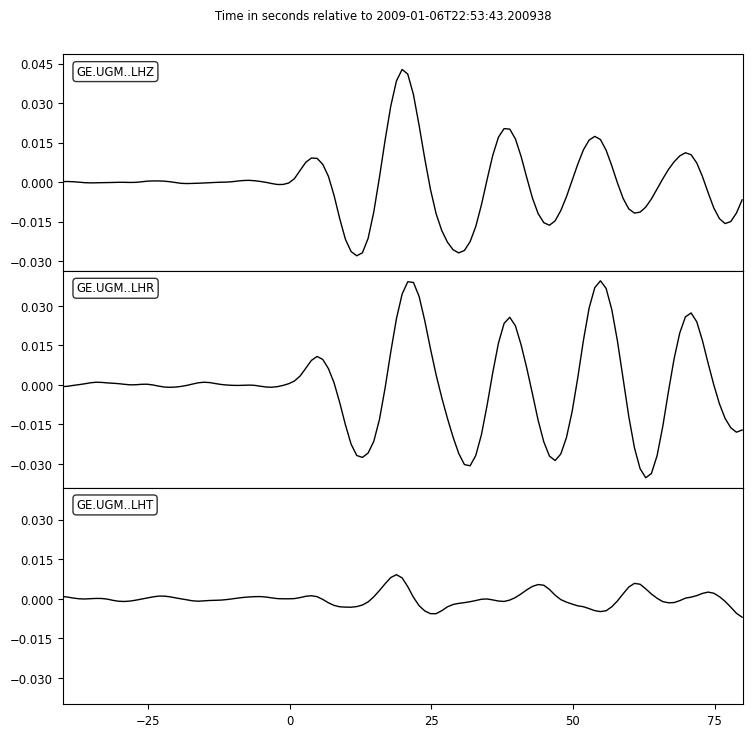

In [441]:
rotated = attached.copy()
baz = gps2dist_azimuth(lat1=-0.400, lon1=132.760, lat2=inv[0][0].latitude, lon2=inv[0][0].longitude)
rotated.rotate('NE->RT', back_azimuth=baz[2])
# rotated.plot(type="relative")
rotated.plot(starttime=stream[0].stats.starttime+1800+tobs-40, endtime=stream[0].stats.starttime+1800+tobs+80, reftime=stream[0].stats.starttime+1800+tobs,type="relative")

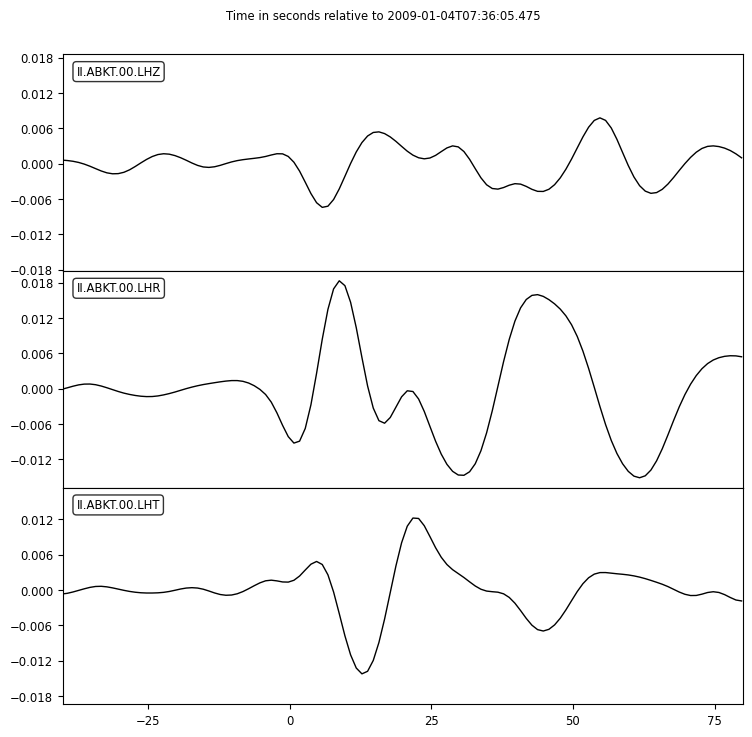

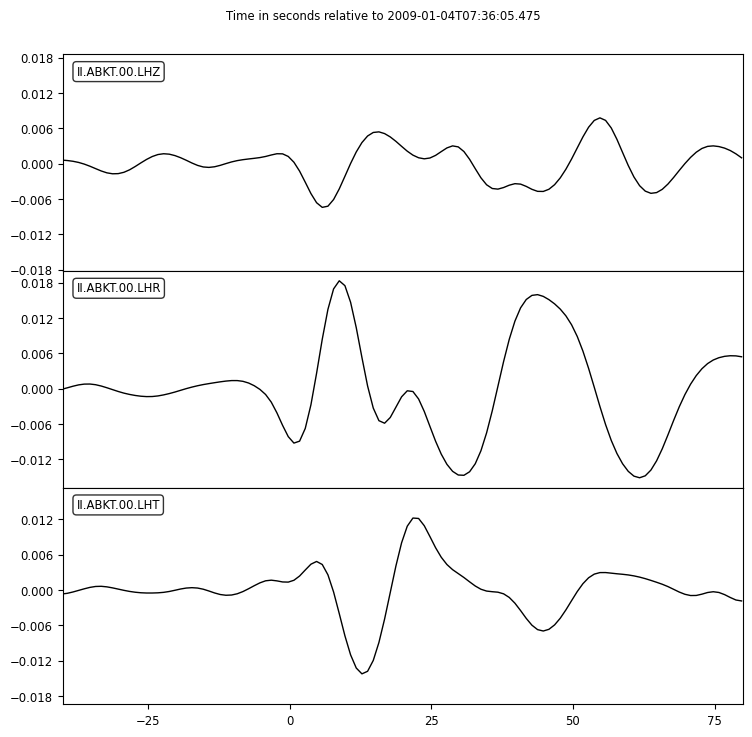

In [139]:
saved_stream.plot(starttime=stream[0].stats.starttime+1800+tobs-40, endtime=stream[0].stats.starttime+1800+tobs+80, reftime=stream[0].stats.starttime+1800+tobs,type="relative")

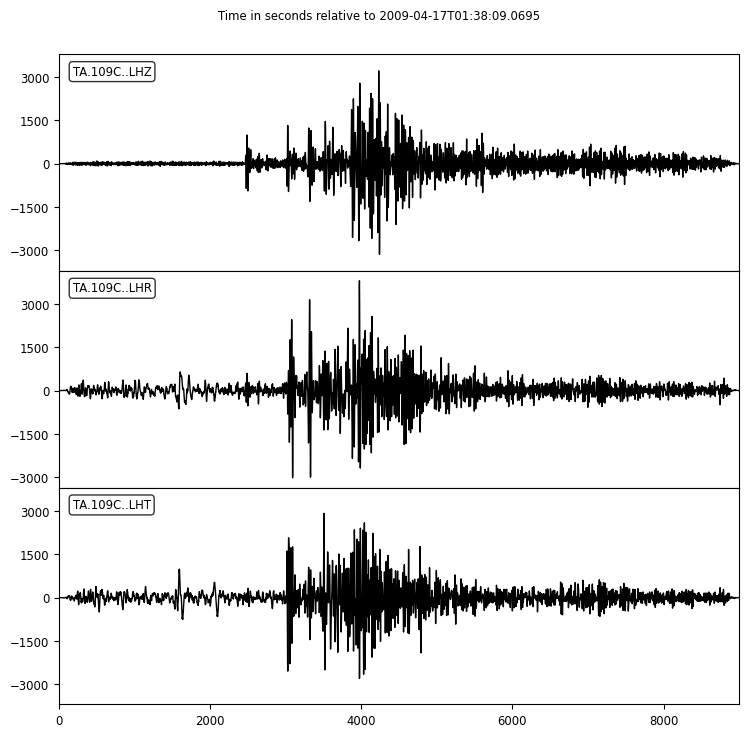

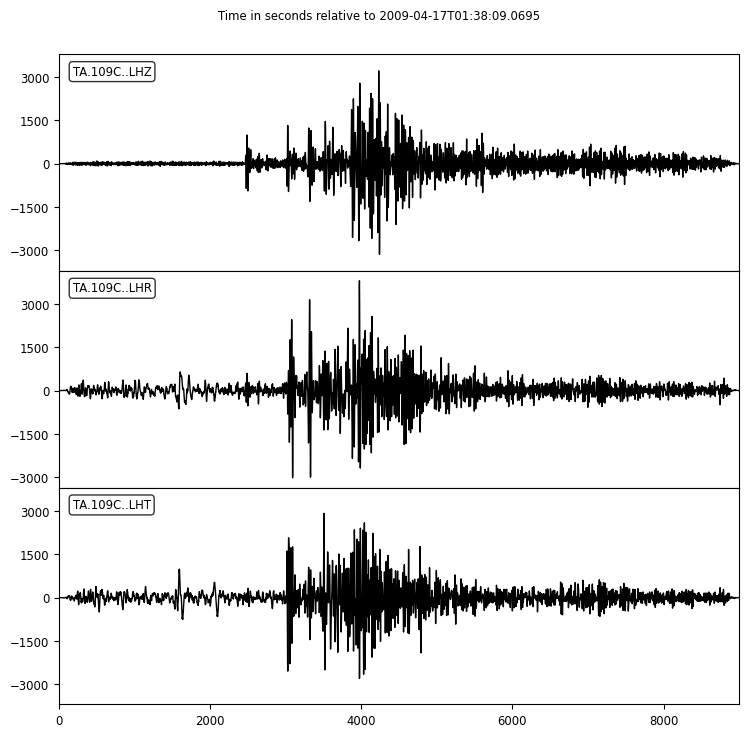

In [4]:
from obspy.signal.invsim import simulate_seismometer
# st2 = st_raw.copy().remove_response(output="DISP", pre_filt=(0.005, 0.006, 30.0, 35.0))
# st2[0].attach_response(inv)
# inv[0][0][0].response.instrument_sensitivity
# inv[0][0][0].response.get_paz().stage_gain
st_sync = st_raw.copy() \
    .remove_response(output="DISP", pre_filt=(0.005, 0.006, 30.0, 35.0)) \

for i in range(3):
    sts2 = {'gain': inv[0][0][i].response.get_paz().stage_gain,
        'poles': inv[0][0][i].response.get_paz().poles,
        'sensitivity': inv[0][0][i].response.instrument_sensitivity.value,
        'zeros': inv[0][0][i].response.get_paz().zeros}
    st_sync[i].data = simulate_seismometer(st_sync[i].data, samp_rate=st_sync[0].stats.sampling_rate, paz_simulate=sts2)

st_sync = st_sync.rotate('NE->RT', back_azimuth=baz[2]) \
    .resample(1.00)
    # .detrend("spline", order=2, dspline=500) \
    # .filter('lowpass', freq=0.05, corners=2, zerophase=False) \
    # .filter('bandpass', freqmin=0.03, freqmax=0.05, corners=2, zerophase=True)
st_sync.plot(type='relative')

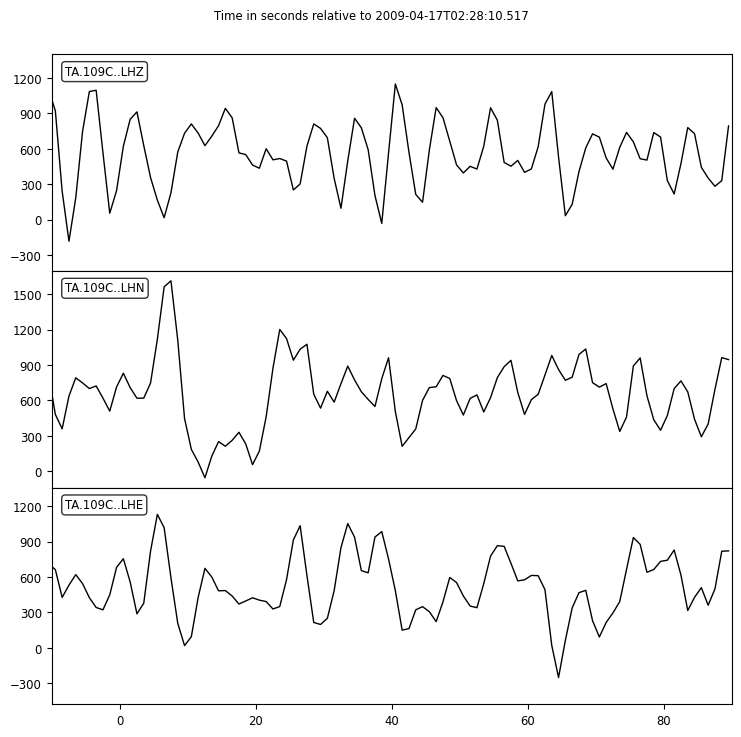

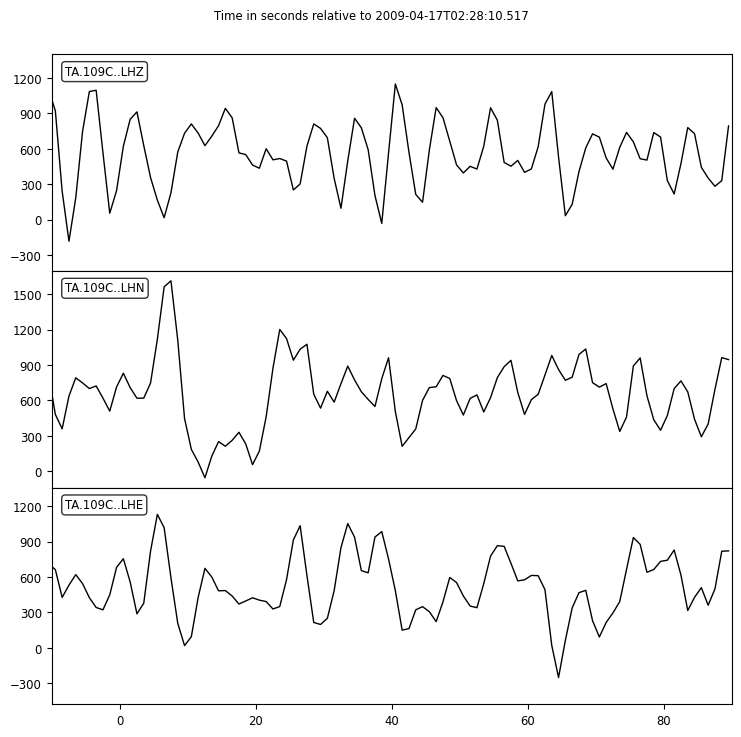

In [5]:
pick = 1201.8170
st_raw.plot(starttime=t+pick-10, endtime=t+pick+90, reftime=t+pick, type='relative')


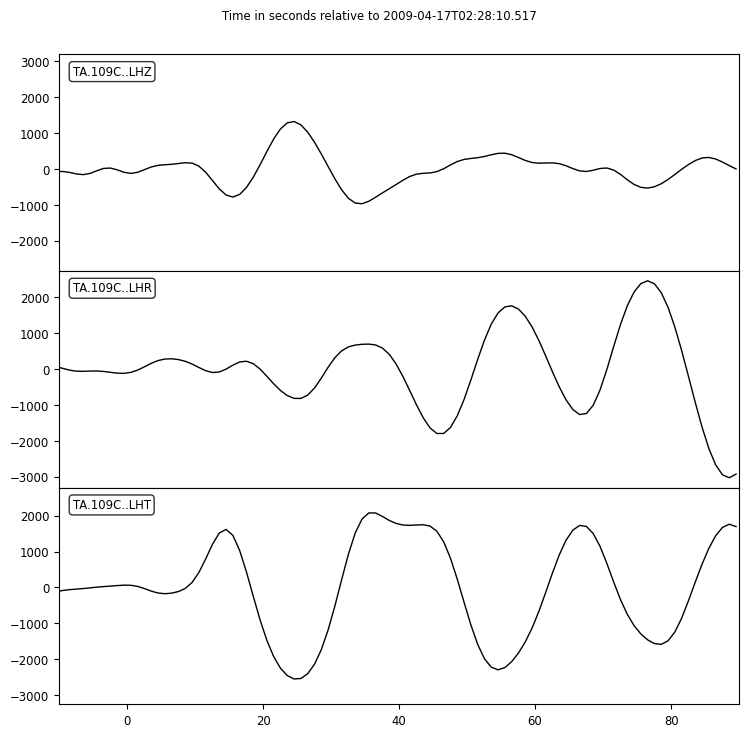

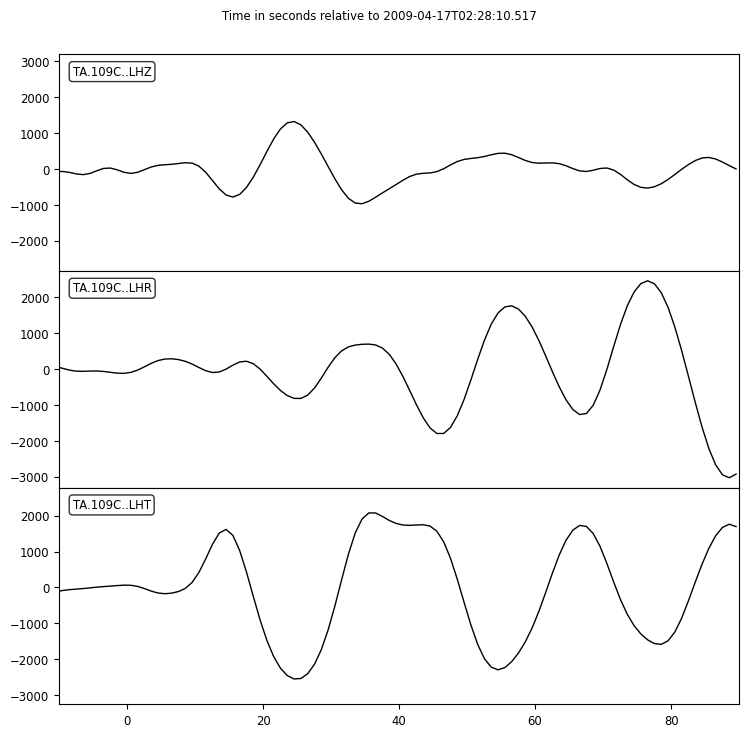

In [6]:
st_sync.plot(starttime=t+pick-10, endtime=t+pick+90, reftime=t+pick, type='relative')

In [116]:
baz

(8144572.090698388, 61.30957618026633, 324.9251127676964)

In [4]:
from obspy import UTCDateTime
# starttime = UTCDateTime("1995-01-03T16:11:00")
# endtime = UTCDateTime("1995-01-03T16:12:00")
starttime = UTCDateTime("1995-01-03T00:00:00")
endtime = UTCDateTime("1995-01-03T23:59:59")
# starttime._set_julday(3)
# endtime._set_julday(3)

In [5]:
# cat = client.get_events(starttime=starttime, endtime=endtime, catalog="ISC")
cat = client.get_events(starttime=starttime, endtime=endtime, minmagnitude=5, catalog="ISC")
print(cat)

6 Event(s) in Catalog:
1995-01-03T16:11:57.080000Z | -57.679,  -65.967 | 5.7 mw
1995-01-03T12:58:45.610000Z |  -3.462, +134.205 | 5.0 mb
1995-01-03T07:02:45.550000Z | +40.500, +143.656 | 5.0 mb
1995-01-03T06:49:20.350000Z | -19.710, -178.084 | 5.3 mb
1995-01-03T06:01:23.830000Z | +40.470, +143.612 | 5.1 mb
1995-01-03T02:54:54.270000Z | -56.201,  -27.390 | 5.5 mb


/Users/jun/.local/share/virtualenvs/phasepick-mEodVLkE/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


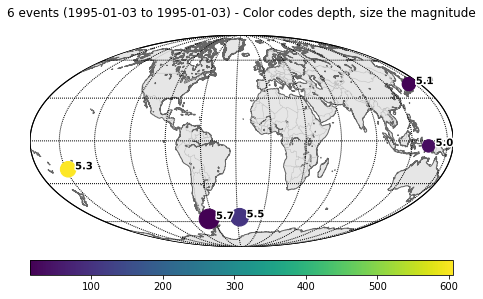

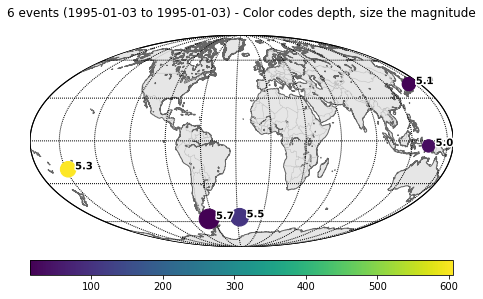

In [6]:
# import matplotlib.pyplot as plt
# To fix a flipped global map, negative sign has been added at /Users/jun/.local/share/virtualenvs/phasepick-mEodVLkE/lib/python3.9/site-packages/obspy/imaging/maps.py:342
cat.plot()

In [11]:
from obspy.clients.fdsn import Client
client = Client("RESIF")

In [8]:
import json
with open('sta2net.json') as user_file:
    parsed_json = json.load(user_file)
parsed_json['ANMO']['network']

'SR'

In [3]:
import os
import h5py
import numpy as np
import pandas as pd
def open_hdf5(filename):
    os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'
    try:
        db = h5py.File(filename, mode='a')
    except:
        db = h5py.File(filename, mode='w')
    return db

tbPcomb = pd.read_csv("/Users/jun/Downloads/drive-download-20220512T014633Z-001/Pcomb.4.data.network.table" ,delim_whitespace=True)

In [5]:
t0 = UTCDateTime(2020, 7, 20)
sta = client.get_stations(network="XF", station="*", channel="*", 
                    #  level="response", 
                     starttime=t0, endtime=t0+1)
print(sta)

FDSNNoDataException: No data available for request.
HTTP Status code: 204
Detailed response of server:



In [27]:
sta.networks[0].code

'SY'

In [30]:
cli_t0

1996-06-08T23:19:00.000000Z

In [12]:
cli_sta = client.get_stations(station="SP*")
cli_sta

Inventory created at 2022-06-20T04:47:02.000000Z
	Created by: RESIF WEB SERVICE: fdsnws-station | version: 1.1.1 
		    http://ws.resif.fr/fdsnws/station/1/query?station=SP%2A
	Sending institution: RESIF-SI (RESIF-DC)
	Contains:
		Networks (2):
			FR, G
		Stations (2):
			FR.SPIF (crête de Spivol)
			G.SPB (Sao Paulo, Brazil)
		Channels (0):


In [ ]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
client = Client("IRIS")
sta2net = {}
staMissing = {}
for index, row in tbPcomb.iterrows():
    if not row['station'] in staMissing:
        if not row['station'] in sta2net:
            print(row['station'])
            cli_t0 = UTCDateTime("%.4d%.3d" % (row['year'], row['day']), iso8601=True)
            cli_t0 = cli_t0 + row['hour']*3600 + row['min']*60
            try:
                cli_sta = client.get_stations(network=row['network'], station=row['station'],
                        starttime=cli_t0, endtime=cli_t0+1)
                sta2net[row['station']] = cli_sta.networks[0].code
            except:
                staMissing[row['station']] = row['network']
        


In [3]:
import os
import json
sta2net = {}
directories = os.listdir('./training')
for directory in directories:
    if not directory == ".DS_Store":
        filenames = os.listdir(f'./training/{directory}')
        for filename in filenames:
            keys = filename.split(".")
            if not keys[1] in sta2net:
                sta2net[keys[1]] = {"fullname": keys[1], "network": keys[0]}
with open('sta2net.json', 'w') as outjson:
    json.dump(sta2net, outjson)

In [4]:
import pickle
from obspy.clients.fdsn import Client
from picker import Event,Station,Record,SeismicData
client = Client('IRIS')
finished = []

with open('data_fetched.pkl', 'rb') as inp:
    data = pickle.load(inp)

for event in data.events:
    srctime = event.srctime
    srctime.precision = 3
    starttime = srctime - 0.5 * 60 * 60
    endtime = srctime + 2 * 60 * 60
    for station in event.stations:
        key = station.labelsta['name']

        if (not key in finished) and (not key in sta2net):
            finished.append(key)
            try:
                inv = client.get_stations(station=f"{key}", starttime=starttime, endtime=endtime)

            except:
                try:
                    inv = client.get_stations(starttime=starttime, endtime=endtime,
                            minlatitude=station.labelsta['lat']-0.02, maxlatitude=station.labelsta['lat']+0.02,
                            minlongitude=station.labelsta['lon']-0.02, maxlongitude=station.labelsta['lon']+0.02)
                except:
                    # print(srctime, key, '... X (station not exists)')
                    pass

            # print(inv.networks[0].code)
            for network in inv.networks:
                if network.code == "SY":
                    inv.networks.remove(network)

            if len(inv.networks) > 0 and (key != inv.networks[0].stations[0].code):
                try:
                    print(srctime, f"[{key}] network-fullname ({inv.networks[0].code}-{inv.networks[0].stations[0].code})")
                except:
                    print(srctime, f"[{key}] network-fullname ({inv.networks[0].code}-{inv.networks[0].stations[0].code})", '... X (data not exists)')

            

1996-06-08T23:19:15.100Z [POPX] network-fullname (XC-LU2A)
1997-10-28T06:15:17.300Z [HELX] network-fullname (CN-SCHQ)
2002-10-12T20:09:11.500Z [SER2] network-fullname (CN-LLLB)
2004-05-03T04:36:50.000Z [BDA2] network-fullname (CN-LLLB)
2007-01-05T16:52:22.400Z [O002] network-fullname (CN-ULM)
2007-01-05T16:52:22.400Z [O058] network-fullname (CN-ULM)
2007-01-05T16:52:22.400Z [SP85] network-fullname (CN-ULM)
2007-01-05T16:52:22.400Z [SP87] network-fullname (CN-ULM)
2007-01-05T16:52:22.400Z [SP93] network-fullname (CN-ULM)
2007-01-05T16:52:22.400Z [SP97] network-fullname (CN-ULM)
2007-01-05T16:52:22.400Z [SPA7] network-fullname (NO-SPA3)
2007-01-05T16:52:22.400Z [SPA8] network-fullname (NO-SPA3)
2007-01-05T16:52:22.400Z [SPB7] network-fullname (NO-SPB3)
2007-01-05T16:52:22.400Z [SPB9] network-fullname (NO-SPB3)
2007-01-05T16:52:22.400Z [SPC5] network-fullname (NO-SPB3)
2007-01-05T16:52:22.400Z [SPC6] network-fullname (NO-SPB3)
2007-01-05T16:52:22.400Z [SPC8] network-fullname (NO-SPB3)
200

In [5]:
import pandas as pd
df = pd.DataFrame([{'a':1, 'b':2}, {'a':2, 'b':4}])
df

,a,b
0,1,2
1,2,4


In [4]:
tbPcomb

,phase,residual,error,ellipcor,crustcor,obstim,calctim,year,day,hour,...,sec,eqlat,eqlon,eqdep,station,network,stalat,stalon,dist,azi
0,P,3.231,2.3,0.046,-0.049,790.1756,786.9446,1976,1,1,...,39.6,-28.61,-177.64,59.0,ANMO,SR,34.946,253.543,92.216,51.093
1,P,4.188,2.3,0.250,-0.048,404.7679,400.5803,1976,1,1,...,39.6,-28.61,-177.64,59.0,CTA,HG,-20.088,146.254,33.867,276.340
2,P,2.571,1.3,0.297,-1.511,574.5100,571.9387,1976,1,1,...,39.6,-28.61,-177.64,59.0,GUMO,SR,13.588,144.866,55.450,314.061
3,P,2.644,1.3,0.152,-1.490,558.4223,555.7786,1976,1,1,...,39.6,-28.61,-177.64,59.0,KIP,HG,21.423,201.985,53.227,22.997
4,P,1.600,1.3,0.584,1.285,817.8323,816.2324,1976,1,1,...,39.6,-28.61,-177.64,59.0,ZLP,HG,-16.270,291.875,98.596,113.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247153,P,2.798,2.3,-0.362,-0.178,461.3046,458.5070,2009,365,9,...,24.0,-59.40,-150.98,10.0,TAU,G,-42.910,147.320,40.440,265.777
247154,P,1.871,2.3,-0.084,-0.027,770.0510,768.1802,2009,365,9,...,24.0,-59.40,-150.98,10.0,UGM,G,-7.913,110.523,87.557,258.702
247155,P,6.297,2.3,-0.326,-0.492,355.7864,349.4895,2009,365,9,...,24.0,-59.40,-150.98,10.0,WHZ,G,-45.894,167.947,27.833,280.645
247156,P,1.454,2.3,-0.163,-0.034,643.2680,641.8143,2009,365,9,...,24.0,-59.40,-150.98,10.0,WRAB,G,-19.934,134.360,65.258,272.554


In [13]:
#read

from obspy import read, UTCDateTime
from picker import Event

savedir = f"./training/2009-04-17T02:08:08.700Z"
print(savedir)
st = read(f"{savedir}/TA.H14A.LH.obspy")

./training/2009-04-17T02:08:08.700Z


In [35]:
t = UTCDateTime("2009-04-17T02:08:08.700Z")
f"_{t.year:4d}{t.month:02d}{t.day:02d}{t.hour:02d}{t.minute:02d}{t.second:02d}_EV"

'_20090417020808_EV'

In [41]:
import glob
glob.glob('/Users/jun/phasepick/training/1976-01-01T12:09:39.600Z/*ANMO*')[0].split('/')[-1].split('.')[0]

'SR'

In [45]:
# st[0].data
import numpy as np
event_data = np.transpose([st[0].data, st[1].data, st[2].data])
event_data

array([ 860, 1123, 1372, ...,  993, 1022, 1095], dtype=int32)

In [1]:
from picker import *
from obspy.clients.fdsn import Client

client = Client('IRIS')
with open('data.pkl', 'rb') as inp:
    loaddata = pickle.load(inp)
data = SeismicData(client, [])
data.events = loaddata.events

In [ ]:
print(data.events[0].stations[0].labelsta['name'])
print([ [station.labelsta['name'] for station in event.stations] for event in data.events])

## Translation from Christine's Code

In [1]:
# common variables
import struct
class irisXXX():
    def __init__(self, mx=500001, nx=20001):
        self.niris = 0
        self.nmx = 0
        self.sta = [''] * mx
        self.chn = [''] * mx
        self.typ = [''] * mx
        self.iy1 = [0] * mx
        self.id1 = [0] * mx
        self.ih1 = [0] * mx
        self.iy2 = [0] * mx
        self.id2 = [0] * mx
        self.ih2 = [0] * mx
        self.freql = 0.0
        self.freqh = 0.0
        self.tfreq = [0.0] * nx
        self.treal = [0.0] * nx
        self.trealw = [0.0] * nx
        self.timag = [0.0] * nx
        self.timagw = [0.0] * nx

# class InstrumentResponse():
#     def __init__(self, network, station, component, start_end_times):
#         self.sensitivity = {}
#         filename = f"/Users/jun/phasepick/resp.dir/{network}.{station}.{component}.{start_end_times}"
#         try:
#             with open(filename, 'rb') as file:
#                 buffer0, niris, freql, freqh, buffer1 = struct.unpack('>iiffi', file.read(20))
#                 for k in range(niris):
#                     buffer0, stfreq, streal, stimag, buffer1 = struct.unpack('>ifffi', file.read(20))
#                     self.sensitivity[stfreq] = complex(-streal, -stimag)
#         except FileNotFoundError:
#             print('Response file not found:', filename)

class InstrumentResponse():
    def __init__(self, network, station, component, start_end_times=None, timestamp=None):
        self.component = component
        self.sensitivity = {}

        # fill blank char
        if len(network) == 1: network += '-'
        if len(station) == 3: station += '-'

        if start_end_times:
            filename = f"/Users/jun/phasepick/resp.dir/{network}.{station}.{component}.{start_end_times}"
        elif timestamp:
            if type(timestamp) is not UTCDateTime: timestamp = UTCDateTime(timestamp)
            for search in glob.glob(f"/Users/jun/phasepick/resp.dir/{network}.{station}.{component}.*"):
                elements = search.split('/')[-1].split('.')
                resp_start = UTCDateTime(year=int(elements[-6]), julday=int(elements[-5]), hour=int(elements[-4]))
                resp_end = UTCDateTime(year=int(elements[-3]), julday=int(elements[-2]), hour=int(elements[-1]))
                if timestamp > resp_start and timestamp < resp_end:
                    filename = search
                    break
        else:
            raise ValueError("At least one parameter has to be given: start_end_times, timestamp")
        
        try:
            if filename:
                with open(filename, 'rb') as file:
                    buffer0, niris, freql, freqh, buffer1 = struct.unpack('>iiffi', file.read(20))
                    for k in range(niris):
                        buffer0, stfreq, streal, stimag, buffer1 = struct.unpack('>ifffi', file.read(20))
                        self.sensitivity[stfreq] = complex(-streal, -stimag)
        except UnboundLocalError:
            print(f'Response file not found: {start_end_times if start_end_times else timestamp} for {network}.{station}.{component}')
        except FileNotFoundError:
            print('Response file not found:', filename)

In [1]:
# basic functions
def evresh(common, w):
    tmp = float(w) / (2.0 * 3.1415926535)
    if tmp <= tfreq[0]:
        return complex(treal[0], timag[0])

    for k in range(common.niris):
        if tmp < tfreq[k+1]:
            tmp0 = (tmp - tfreq[k]) / (tfreq[k+1] - tfreq[k])
            tmp1 = tmp0 * (treal[k+1] - treal[k]) + treal[k]
            tmp2 = tmp0 * (timag[k+1] - timag[k]) + timag[k]
            return complex(tmp1, tmp2)

    return complex(treal[common.niris - 1], timag[common.niris - 1])

def lenb2(pathname):
    jchar = len(pathname)
    k = 0
    for i in range(jchar):
        if pathname[i] != ' ':
            k = i
            break
    
    if k == 0:
        return 0
    
    lenb2 = 0
    for i in range(k, jchar):
        if pathname[i] == ' ':
            break
        lenb2 += 1
    
    if k == 1:
        return lenb2
    
    for i in range(lenb2):
        j = k + i
        pathname[i] = pathname[j]
    
    return lenb2


def eval2(y, nn, u, s):
    if y <= 1.0:
        return u[0]
    if y >= float(nn):
        return u[nn-1]
    
    k1 = int(y)
    k = k1 + 1
    dk = k - y
    dk1 = y - k1
    ff1 = s[k1-1] * dk**3
    ff2 = s[k-1] * dk1**3
    eval2 = (dk * (6.0 * u[k1-1] - s[k1-1]) + dk1 * (u[k-1] * 6.0 - s[k-1]) + ff1 + ff2) / 6.0
    return eval2

In [2]:
# station setting
def allnsta(nsta):
    lsta = 5000
    dtype = [''] * lsta
    dname = [''] * lsta
    dsta = [0] * lsta
    dlat = [0] * lsta
    dlon = [0] * lsta
    delev = [0] * lsta
    ddep = [0] * lsta
    rad = 0.017453293
    ifirs = 0
    th = 0.0
    ph = 0.0
    istat = 0
    
    if not ifirs == 1:
        with open('/Users/chouser/subs.dir/resp.dir/stations4disc', 'r') as file:
            j = 0
            while True:
                j += 1
                line = file.readline()
                if not line:
                    break
                parts = line.split()
                dsta[j] = int(parts[0])
                dtype[j] = parts[1]
                dlat[j] = float(parts[2])
                dlon[j] = float(parts[3])
                delev[j] = float(parts[4])
                ddep[j] = float(parts[5])
                dname[j] = ' '.join(parts[6:])
                if dlon[j] < 0.0:
                    dlon[j] += 360.0
    
        ifirs = 1
        ndat = j - 1
    
    for i in range(ndat):
        if nsta == dsta[i]:
            istat = 1
            th = rad * (90.0 - dlat[i])
            ph = rad * dlon[i]
            return th, ph
    
    print('in allnsta: station not found:', nsta)


# Testing the translation
# [th, ph] = allnsta(123)
# print('th:', th)
# print('ph:', ph)

def allgsta(nsta, ntyp):
    lsta = 5000
    dtype = [''] * lsta
    ntyp = ''
    dname = [''] * lsta
    dsta = [0] * lsta
    dlat = [0] * lsta
    dlon = [0] * lsta
    delev = [0] * lsta
    ddep = [0] * lsta
    rad = 0.017453293
    ifirs = 0
    th = 0.0
    ph = 0.0
    istat = 0

    if not ifirs == 1:
        with open('/Users/chouser/subs.dir/resp.dir/stations', 'r') as file:
            j = 0
            while True:
                j += 1
                line = file.readline()
                if not line:
                    break
                parts = line.split()
                dsta[j] = int(parts[0])
                dtype[j] = parts[1]
                dlat[j] = float(parts[2])
                dlon[j] = float(parts[3])
                delev[j] = float(parts[4])
                ddep[j] = float(parts[5])
                dname[j] = ' '.join(parts[6:])
                if dlon[j] < 0.0:
                    dlon[j] += 360.0

        ifirs = 1
        ndat = j - 1

    for i in range(ndat):
        if nsta == dsta[i]:
            if ntyp == dtype[i]:
                istat = 1
                th = rad * (90.0 - dlat[i])
                ph = rad * dlon[i]
                return th, ph, ntyp
            elif ntyp == '':
                istat = 1
                th = rad * (90.0 - dlat[i])
                ph = rad * dlon[i]
                ntyp = dtype[i]
                return th, ph, ntyp

    print('station not found:', nsta)


# Testing the translation
# th, ph, ntyp = allgsta(123, '')
# print('th:', th)
# print('ph:', ph)
# print('ntyp:', ntyp)

In [ ]:
# replaced by the __init__ function for object
import struct
def pznall(common, nsta, nchn, ntyp, iy, id):
    iflag = 1
    istat = -1

    if iflag == 1:
        filename1 = '/Users/chouser/subs.dir/resp.dir/LIST' # need this file
        with open(filename1, 'r') as file:
            n = 0
            while True:
                line = file.readline()
                if not line:
                    break
                parts = line.split()
                common.typ[n] = parts[0]
                common.sta[n] = parts[1]
                common.chn[n] = parts[2]
                common.iy1[n] = int(parts[3])
                common.id1[n] = int(parts[4])
                common.ih1[n] = int(parts[5])
                common.iy2[n] = int(parts[6])
                common.id2[n] = int(parts[7])
                common.ih2[n] = int(parts[8])
                n += 1
        nmx = n
        if nmx > len(common.sta):
            raise ValueError('Resize dimension of pznall')
        iflag = 0

    ftmp4 = ntyp[:2]
    ftmp4d = ntyp[:2]

    if ntyp[:3] == 'IDA':
        if nchn[:2] == 'VG' or nchn[:2] == 'UG' and nsta[:3] != 'BFO':
            ftmp4 = 'ID'
            ftmp4d = 'ID'
        else:
            ftmp4 = 'II'
            ftmp4d = 'II'

    if ntyp[:3] == 'GEO' or ntyp[:2] == 'G-' or ntyp[:2] == 'G ':
        ftmp4 = 'G-'
        ftmp4d = 'G-'

    if ntyp[:3] == 'OID' or ntyp[:2] == 'ID':
        ftmp4 = 'ID'
        ftmp4d = 'ID'

    if ntyp[:3] == 'MED' or ntyp[:2] == 'MN':
        ftmp4 = 'MN'
        ftmp4d = 'MN'

    ftmp3 = nsta
    ftmp2 = nchn
    if ftmp3[3] == ' ':
        ftmp3 = ftmp3[:3] + '-'

    for i in range(nmx):
        if ftmp4 != common.typ[i]:
            continue
        if ftmp3 != common.sta[i]:
            continue
        if ftmp2[:3] != common.chn[i]:
            continue
        if iy < common.iy1[i]:
            continue
        if iy > common.iy2[i]:
            continue
        if iy == common.iy1[i] and id < common.id1[i]:
            continue
        if iy == common.iy2[i] and id > common.id2[i]:
            continue
        ftmp5 = f"{common.iy1[i]}.{common.id1[i]:03d}.{common.ih1[i]:02d}.{common.iy2[i]}.{common.id2[i]:03d}.{common.ih2[i]:02d}"
        filename2 = f"/Users/chouser/subs.dir/resp.dir/{ftmp4d}.dir/{ftmp4}.{ftmp3}.{ftmp2[:3]}.{ftmp5}"
        try:
            with open(filename2, 'rb') as file:
                buffer0, common.niris, freql, freqh, buffer1 = struct.unpack('>iiffi', file.read(20))
                for k in range(common.niris):
                    buffer0, stfreq, streal, stimag, buffer1 = struct.unpack('>ifffi', file.read(20))
                    common.tfreq[k] = stfreq
                    common.treal[k] = -streal
                    common.timag[k] = -stimag
                istat = 0
        except FileNotFoundError:
            print('Response file not found:', ftmp4, ftmp3, nchn)
        return istat

    print('Response file not found:', ftmp4, ftmp3, nchn)


In [210]:
#test section
with open('/Users/jun/Downloads/SR.GRFO.LHZ.1978.225.00.1993.329.00', 'rb') as file:

    buffer0, niris, freql, freqh, buffer1 = struct.unpack('>iiffi', file.read(20))
    # s = file.readline()
    print(niris, freql, freqh)
    # print(s)
    for k in range(niris):
        buffer0, stfreq, streal, stimag, buffer1 = struct.unpack('>ifffi', file.read(20))
        # s = struct.unpack('24s', file.read(24))
        # s = struct.unpack('>6i', file.read(24))
        # print(s)
        # print(s[0].decode('ascii'))
        # print(list(bytearray(s)))
        # print(s.decode('ascii'))
        print((stfreq), -(streal), -(stimag))
#test section

500 1.000000013351432e-10 0.5
1.000000013351432e-10 -1.712957964607166e-21 1.9008100401225931e-28
0.0010020040208473802 -7189809.0 11799510.0
0.0020040080416947603 27567230.0 142464496.0
0.0030060119461268187 322057088.0 360845600.0
0.004008016083389521 956071616.0 424538112.0
0.005010019987821579 1812792064.0 113676600.0
0.006012023892253637 2684439040.0 -678492800.0
0.007014027796685696 3350633984.0 -1948846976.0
0.008016032166779041 3619214080.0 -3608601088.0
0.009018035605549812 3347613952.0 -5508004864.0
0.010020039975643158 2454498048.0 -7459552256.0
0.01102203968912363 924663104.0 -9260302336.0
0.012024049647152424 -1192093056.0 -10713109504.0
0.013026050291955471 -3787744000.0 -11645689856.0
0.014028060249984264 -6707710976.0 -11926290432.0
0.015030059963464737 -9766214656.0 -11474660352.0
0.016032060608267784 -12763679744.0 -10267570176.0
0.017034070566296577 -15504329728.0 -8338713088.0
0.018036069348454475 -17812269056.0 -5773332992.0
0.01903807930648327 -19544479744.0 -2698

In [ ]:
#load ANMO instrument response into respa
def inresa(iscan):
    ndat = 10000
    df = 0.0
    pi = 3.14159265358979
    sh = 0.0
    wout = complex(0.0, 0.0)
    respa = [complex(0.0, 0.0)] * ((ndat // 2) + 1)
    cmhz = 500.0/pi

    nsta = 'GRFO '
    nchn = 'LHZ '
    ntyp = 'SR  '
    iy = 1983
    id = 1
    istat = pznall(nsta, nchn, ntyp, iy, id)
    if istat == 4:
        istat = 0
    nh = iscan // 2
    sh = 1.0
    df = 2.0 * pi / (sh * iscan)
    for i in range(1, nh + 1):
        wr = i * df
        if wr * cmhz > 167.0:
            respa[i] = complex(0.0, 0.0)
        else:
            zz = complex(0.0, wr)
            wout = evresh(wr)
            respa[i] = wout / complex(0.0, wr)
    respa[0] = respa[1]
    return istat

In [224]:
import h5py
from picker import SeismicData
with h5py.File('updeANMO.hdf5','r') as f:
    print(f['data'])
    # i = f['data/EFI.II_20090113140402_EV'][...]
    i = f['data/UGM.GE_20090106224827_EV'][...]
    # 2009-01-06T22:48:27.200Z/GE.UGM
    print(i)#2009-01-04T07:14:00.600Z/II.ABKT.LH.obspyABKT.II_200901040714_EV


<HDF5 group "/data" (81898 members)>
[[-1.03292405e-04 -1.22315378e-03 -1.58024079e-04]
 [-1.05072046e-04 -1.43446762e-03 -2.06997676e-04]
 [-8.38072083e-05 -1.53681601e-03 -2.53001781e-04]
 ...
 [ 1.12881782e-02  8.25465471e-03 -1.17780389e-02]
 [ 1.44930575e-02  9.18320939e-03 -1.21820895e-02]
 [ 1.61614213e-02  9.45924409e-03 -1.17978603e-02]]


array([1.00000001e-10, 1.66722341e-04, 3.33444581e-04, ...,
       4.99666556e-01, 4.99833278e-01, 5.00000000e-01])

In [249]:
import numpy as np
freq = np.array(list(reference_response.sensitivity.keys()))
freq_interp = np.linspace(freq.min(), freq.max(), num=len(fdomain_data)//2)
# freq_interp
resp_interp = np.interp(freq_interp, list(reference_response.sensitivity.keys()), list(reference_response.sensitivity.values()))
resp_interp[0] = complex(0, 0)
# len(resp_interp)

3000

In [236]:
tfreq = list(reference_response.sensitivity.keys())
for i in range(len(tfreq)):
    print(i, tfreq[i])

0 1.000000013351432e-10
1 0.0010020040208473802
2 0.0020040080416947603
3 0.0030060119461268187
4 0.004008016083389521
5 0.005010019987821579
6 0.006012023892253637
7 0.007014027796685696
8 0.008016032166779041
9 0.009018035605549812
10 0.010020039975643158
11 0.01102203968912363
12 0.012024049647152424
13 0.013026050291955471
14 0.014028060249984264
15 0.015030059963464737
16 0.016032060608267784
17 0.017034070566296577
18 0.018036069348454475
19 0.01903807930648327
20 0.020040079951286316
21 0.021042080596089363
22 0.022044090554118156
23 0.023046089336276054
24 0.024048099294304848
25 0.025050099939107895
26 0.026052100583910942
27 0.027054110541939735
28 0.028056109324097633
29 0.029058119282126427
30 0.030060119926929474
31 0.03106212057173252
32 0.032064128667116165
33 0.03306613117456436
34 0.034068141132593155
35 0.03507013991475105
36 0.03607213869690895
37 0.037074148654937744
38 0.03807615116238594
39 0.039078161120414734
40 0.04008015990257263
41 0.04108215868473053
42 0.04

In [517]:
rawdata

3 Trace(s) in Stream:
GE.UGM..LHE | 2009-01-06T22:18:28.069538Z - 2009-01-07T00:48:27.069538Z | 1.0 Hz, 9000 samples
GE.UGM..LHN | 2009-01-06T22:18:28.069538Z - 2009-01-07T00:48:27.069538Z | 1.0 Hz, 9000 samples
GE.UGM..LHZ | 2009-01-06T22:18:28.069536Z - 2009-01-07T00:48:27.069536Z | 1.0 Hz, 9000 samples

/Users/jun/phasepick/venv-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:69: ComplexWarning: Casting complex values to real discards the imaginary part


Text(0.5, 1.0, '2002-02-10T14:07:06.200Z/IU.SJG.LH.obspy')

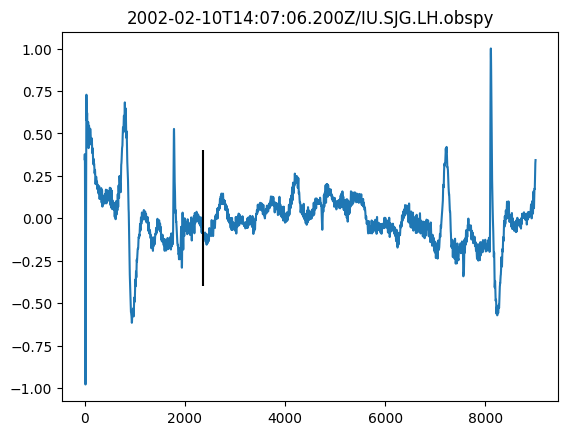

In [37]:
import h5py
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from obspy import read
from obspy.geodetics.base import gps2dist_azimuth
from obspy.core import UTCDateTime
# define object shared in functions
common = irisXXX()

# get instrument response for trace and reference station
reference_response = InstrumentResponse(network='SR', station='GRFO', component='LHZ', start_end_times='1978.225.00.1993.329.00')
# station_response = InstrumentResponse(network='II', station='ABKT', component='LHZ', start_end_times='2006.257.13.2009.339.23')
station_response = InstrumentResponse(network='GE', station='UGM', component='LHZ', start_end_times='2006.180.00.3001.001.00')
# station_response = InstrumentResponse(network='G', station='TAM', component='LHZ', timestamp=UTCDateTime(1992,11,12))

# load waveform for the trace
# data = read("./training/2009-01-04T07:14:00.600Z/II.ABKT.LH.obspy"); tobs=1324.2316
# with h5py.File('updeANMO.hdf5','r') as f:
#     # data_matrix = f['data/EFI.II_20090113140402_EV'][...]
#     data_matrix = f['data/UGM.GE_20090106224827_EV'][...]
#     data = data_matrix[:,2]

# load rawdata
# rawdata = read("./rawdata/2009-01-06T22:48:27.200Z/GE.UGM.LH.obspy"); tobs=315.1314; tobs=566.3833
# filename = "1992-11-12T20:41:04.700Z/G.TAM.LH.obspy"; tobs=570.3630
filename = "2002-02-10T14:07:06.200Z/IU.SJG.LH.obspy"; tobs=570.3630
rawdata = read(f"./rawdata/{filename}")
proceed = rawdata.copy()

# loop for three components
for i in range(3):

    # fast-fourier-transform the trace
    fdomain_data = fft(rawdata[i].data)

    # get frequency array from loaded response
    freq = np.array(list(reference_response.sensitivity.keys()))
    # interpolate frequency array to fit waveform data
    freq_interp = np.linspace(freq.min(), freq.max(), num=len(fdomain_data)//2)
    # interpolate reference and target station response
    ref_resp_interp = np.interp(freq_interp, list(reference_response.sensitivity.keys()), list(reference_response.sensitivity.values()))
    sta_resp_interp = np.interp(freq_interp, list(station_response.sensitivity.keys()), list(station_response.sensitivity.values()))
    # sta_resp_interp /= sta_resp_interp
    # ref_resp_interp /= ref_resp_interp
    # ref_resp_interp[600:700] = 1
    # deconvolve and convolve the trace
    fdomain_data[:len(fdomain_data)//2] = fdomain_data[:len(fdomain_data)//2] / sta_resp_interp * ref_resp_interp
    fdomain_data[len(fdomain_data)//2:] = np.flip(fdomain_data[:len(fdomain_data)//2]) / sta_resp_interp * ref_resp_interp
    # fdomain_data[len(fdomain_data)//2:] = np.flip(fdomain_data[:len(fdomain_data)//2])
    fdomain_data[0] = complex(0, 0)
    # fdomain_data[len(fdomain_data)//2-1] = complex(0, 0)

    # inverse fast-fourier-transform the trace
    deconvolved_data = ifft(fdomain_data)
    # print(deconvolved_data-data, deconvolved_data.shape)
    proceed[i].data = deconvolved_data/max(deconvolved_data)

# rotate to TRZ coordinate
# baz = gps2dist_azimuth(lat1=-0.660, lon1=133.430, lat2=-7.913, lon2=110.523)
baz = gps2dist_azimuth(lat1=-7.913, lon1=110.523, lat2=-0.660, lon2=133.430)
proceed.rotate('NE->RT', back_azimuth=baz[2])
# rotated.plot(type="relative")
# rotated.plot(starttime=stream[0].stats.starttime+1800+tobs-40, endtime=stream[0].stats.starttime+1800+tobs+80, reftime=stream[0].stats.starttime+1800+tobs,type="relative")

# plot
# test = np.array(deconvolved_data, dtype=float)
test = np.array(proceed[2].data, dtype=float)
# plt.plot(np.arange(0,6000), test, np.arange(0,6000), data)
tobeplot = test
# tobeplot = rawdata[0].data
plt.plot(tobeplot)
# plt.plot(np.arange(0,6000), tobeplot)
# # tobs=404
# tobs=1412
# plt.vlines(tobs, ymin=0.2*min(tobeplot[tobs-40*4:tobs+80*4]), ymax=0.2*max(tobeplot[tobs-40*4:tobs+80*4]), colors='black')
# plt.vlines(tobs, ymin=0.2*min(tobeplot[tobs-40*4:tobs+80*4]), ymax=0.2*max(tobeplot[tobs-40*4:tobs+80*4]), colors='black')
# plt.xlim(tobs+1800-35.5, tobs+1800+65.5)
plt.vlines(tobs+1800, ymin=-0.4, ymax=0.4, colors='black')
# plt.ylim(-8000,8000)
plt.title(filename)

In [77]:
import glob
aaaa = glob.glob("./training/2009-01-06T22:48:27.200Z/*.UGM.LH.obspy")
aaaa

['./training/2009-01-06T22:48:27.200Z/GE.UGM.LH.obspy']

In [78]:
saveddataA = read("./training/2009-01-06T22:48:27.200Z/GE.UGM.LH.obspy"); tobs=315.1314; tobs=566.3833
saveddataA[0].meta

         network: GE
         station: UGM
        location: 
         channel: LHT
       starttime: 2009-01-06T22:18:28.069538Z
         endtime: 2009-01-07T00:48:27.069538Z
   sampling_rate: 1.0
           delta: 1.0
            npts: 9000
           calib: 1.0
         _format: PICKLE
    back_azimuth: 251.85698020896263
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 40, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 63488})

In [56]:
import pandas as pd
testtable = pd.read_csv("/Users/jun/Downloads/drive-download-20220512T014633Z-001/Pcomb.4.07.09.table", delim_whitespace=True)
# testtable[127340:127350]
# for index, row in testtable.iterrows():
#     if row['year'] == 2002 and row['day'] == 41:
#         print(row)
for index, row in testtable[127346:127347].iterrows():
# row = testtable[127346]
    ts = f"{row['year']}-{row['day']:03}T{row['hour']:02}:{row['min']:02}:{min(row['sec'],59.999)}Z"
    print(ts)
    print(UTCDateTime(ts))

2002-041T01:47:6.2Z
2002-02-10T01:47:06.200000Z


/Users/jun/phasepick/venv-3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


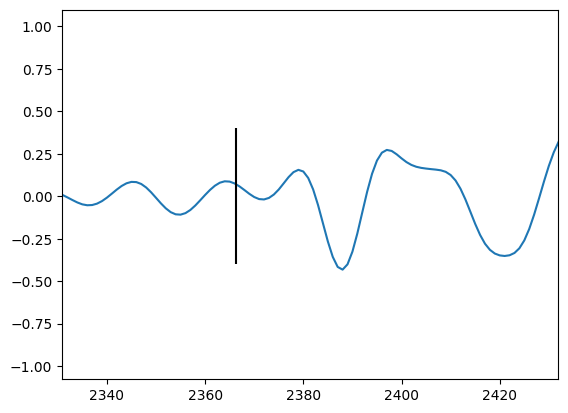

In [57]:
# load rawdata
saveddataA = read("./training/2009-01-06T22:48:27.200Z/GE.UGM.LH.obspy"); tobs=315.1314; tobs=566.3833
plt.plot(saveddataA[2].data)
plt.xlim(tobs+1800-35.5, tobs+1800+65.5)
plt.vlines(tobs+1800, ymin=-0.4, ymax=0.4, colors='black')

In [498]:
baz[2]

251.85698020896263

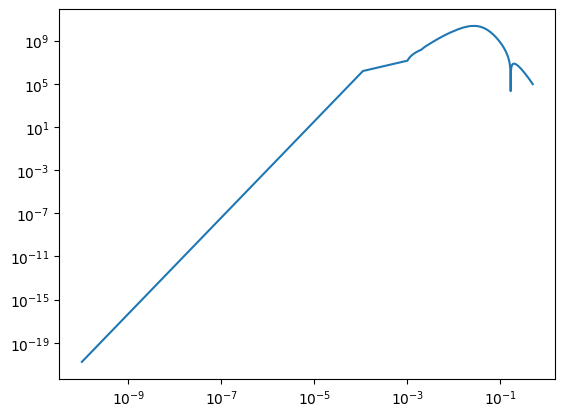

In [365]:
plt.loglog(freq_interp,abs(ref_resp_interp))

In [332]:
sta_resp_interp

array([1.+0.j, 1.+0.j, 1.+0.j, ..., 1.-0.j, 1.-0.j, 1.-0.j])

In [257]:
len(fdomain_data[3001:6000])

2999

In [251]:
fdomain_data

array([-0.05641182-0.j        , -0.06525192+0.00185275j,
       -0.0653349 +0.00252267j, ..., -0.06547648-0.00346j   ,
       -0.0653349 -0.00252267j, -0.06525192-0.00185275j], dtype=complex64)

/Users/jun/phasepick/venv-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


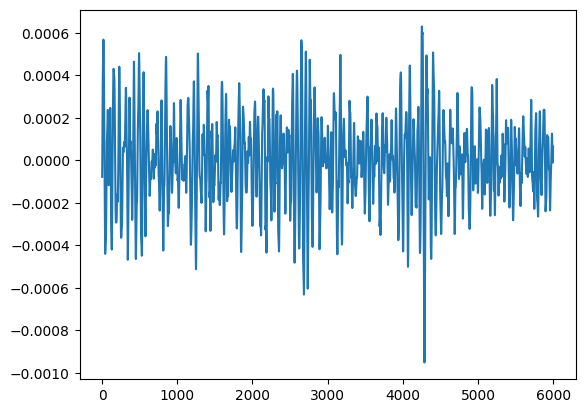

In [207]:
import numpy as np
import matplotlib.pyplot as plt
test = np.array(deconvolved_data, dtype=float)
plt.plot(test)

In [ ]:

plt.plot(float(fdomain_data))

In [ ]:
# main program
import math

common = irisXXX()
evlist = input('enter event list: ')
with open(evlist, 'r') as file:
    for evnam in file:
        evnam = evnam.strip()
        itype = 1
        # gfs_open(io, evnam, itype, nentry)
        print(evnam)
        if nentry <= 0:
            # gfs_close(io)
            continue

        for ifl in range(1, nentry + 1):
            gfs_rwentry(io, head, data, ifl, 'r')
            if nsta == 'PFO ' and ntyp == 'II  ':
                continue
            if nsta == 'SCI2' and ntyp == 'CI  ':
                continue
            if nsta == 'AAK ' and ntyp == 'II  ':
                continue
            if nsta == 'TRIS' and ntyp[0] == 'G':
                continue
            if iy == 2009 and id > 347:
                if ntyp[:2] == 'PB':
                    continue
            if iy == 2007 and 210 < id < 228:
                if nsta[:4] == 'J03A':
                    continue

            kchn = 'xxxx'
            if nchn[0] == 'L' and nchn[2] == 'Z':
                kchn = 'LHZ '

            if ntyp[:2] == 'NZ':
                if nchn[:3] == 'LHU':
                    kchn = 'LHZ'

            if kchn[:3] != 'LHZ':
                continue

            prhdr(ifl, head, itype)
            nh = nscan // 2
            facdwn(nh)
            nscan = 2 * nh
            istat = inresa(nscan)
            if istat != 0:
                print('response not found:', nsta)
                continue
            istat = inrespn(head, nscan)
            if istat != 0:
                print('response not found:', nsta)
                continue
            panlsp(data, nscan, n1, n2, np)
            unmean(data, n1, n2, np)
            datflt(data, nscan)
            fgapsp(data, nscan, n1, n2, np, flag)
            nchn = 'LHZG'
            # gfs_rwentry(2, head, data, 0, 'w')

# gfs_close(io)
# gfs_close(2)